<font color="blue" size="6" style="font-family:sans-serif">Advertisement Success Prediction</font>

# Introduction

## Business Overview

- <p>When one starts a business or is running a business, one needs to make people aware of the fact. Promotion is important for any type of business to let others know about the business.</p>
- <p>Advertising is important for every aspect of a business. It plays an imperative role for both manufacturers and consumers. Advertising is important for the business on the whole as it lets the business gain more customers, thereby increasing business turnaround.</p>

## Problem Statement

- <b>Building a machine learning model to predict whether an advertisement buy will lead to a netgain to the business.</b>

## Stakeholder

- <b>Head of The Marketing Department</b>
- Head of Advertising Firm
- Manager of Regulatory Bodies

## Data Science Metric

- <b>F1 Score</b>

# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE,SelectKBest
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import f_classif, chi2

print('Setup Completed!')

Setup Completed!


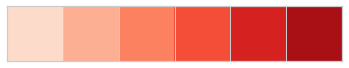

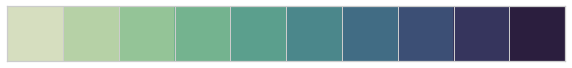

In [2]:
from palettable.colorbrewer.diverging import *

sns.set(style='whitegrid', palette="Spectral_r")
cb_pal = sns.cubehelix_palette(10, start=0.5, rot=-.75)
cpal = sns.color_palette("Reds")
sns.palplot(cpal)
sns.palplot(cb_pal)

In [3]:
# Loading train and test data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
# Display train data

df_train.head().T

,0,1,2,3,4
UserID,UI_9185,UI_449,UI_9014,UI_14987,UI_25532
realtionship_status,Married-civ-spouse,Never-married,Never-married,Married-civ-spouse,Married-civ-spouse
industry,Pharma,Political,Auto,Pharma,Other
genre,Comedy,Comedy,Comedy,Infomercial,Comedy
targeted_sex,Male,Male,Male,Male,Female
average_runtime(minutes_per_week),40,35,40,40,50
airtime,Daytime,Morning,Morning,Primetime,Primetime
airlocation,United-States,International,United-States,United-States,United-States
ratings,0.0274647,0.0274647,0.0274647,0.0274647,0.0274647
expensive,Medium,Low,Low,Low,Low


# Data Preprocessing

## Null/Missing value analysis

In [5]:
# Check null values in data
df_train.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

<b>Insight:</b> <br>
- No null value present in Data. No need to Handle null/missing value.


## Categorical Vs Numerical feature

In [6]:
cat_col = df_train.select_dtypes(exclude=np.number).columns
num_col = df_train.select_dtypes(include=np.number).columns

In [7]:
# Display categorical and numerical columns
print('Total Categorical Coulmns : ', len(cat_col), "\n")
print("Categorical columns :", list(cat_col), "\n")
print('Total Numerical Coulmns : ', len(num_col), "\n")
print("Numerical columns :", list(num_col), "\n")

Total Categorical Coulmns :  9 

Categorical columns : ['UserID', 'realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 'airlocation', 'expensive', 'money_back_guarantee'] 

Total Numerical Coulmns :  3 

Numerical columns : ['average_runtime(minutes_per_week)', 'ratings', 'netgain'] 



## Data description

In [88]:
df_train.describe()

,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


## Data distribution

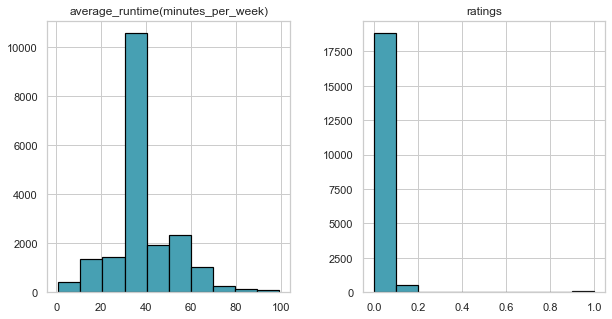

In [9]:
# Visulazing the distibution of the data for every feature
df_train[['average_runtime(minutes_per_week)', 'ratings']].hist(edgecolor='black', linewidth=1.2, figsize=(10, 5));

## Target column distribution

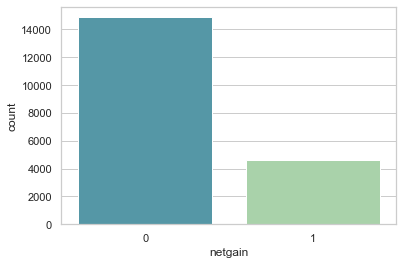

In [10]:
# Check whether Data is biased or not

sns.countplot('netgain', data=df_train)
plt.show()

In [78]:
df_train['netgain'].value_counts()

0    14886
1     4650
Name: netgain, dtype: int64

<b>Insight:</b> <br>
- Data is biased. Hence we can say that most number of the advertisements doesn't add value to net gain.

# Explanatory Data Analysis

In [8]:
# Drop UserID column from dataset
df_eda = df_train.drop(['UserID'], axis=1)
df_test_eda = df_test.drop(['UserID'], axis=1)

In [9]:
# Check all the unique values from each of the columns
columns = df_eda.select_dtypes(exclude=np.number).columns
for col in columns:
    print('Number of unique values for column', col, len(df_eda[col].unique()))
    print('Unique values of column', col, df_eda[col].unique(), '\n')

Number of unique values for column realtionship_status 7
Unique values of column realtionship_status ['Married-civ-spouse' 'Never-married' 'Divorced' 'Separated' 'Widowed'
 'Married-spouse-absent' 'Married-AF-spouse'] 

Number of unique values for column industry 6
Unique values of column industry ['Pharma' 'Political' 'Auto' 'Other' 'Entertainment' 'ClassAction'] 

Number of unique values for column genre 5
Unique values of column genre ['Comedy' 'Infomercial' 'Drama' 'Direct' 'Other'] 

Number of unique values for column targeted_sex 2
Unique values of column targeted_sex ['Male' 'Female'] 

Number of unique values for column airtime 3
Unique values of column airtime ['Daytime' 'Morning' 'Primetime'] 

Number of unique values for column airlocation 42
Unique values of column airlocation ['United-States' 'International' 'Mexico' 'Hong' 'Cuba' 'Germany' 'India'
 'Iran' 'Dominican-Republic' 'Philippines' 'Japan' 'Italy' 'South'
 'Poland' 'Vietnam' 'Columbia' 'Outlying-US(Guam-USVI-etc)'

## What is the Targeted_sex relation with netgain?

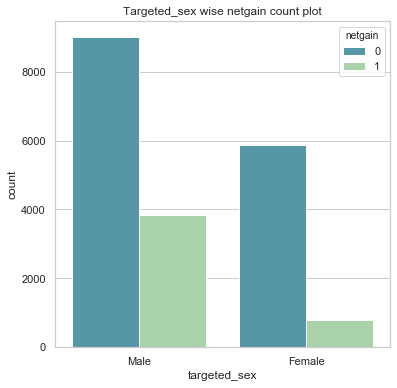

In [13]:
plt.figure(figsize=(6,6))
sns.countplot('targeted_sex', data=df_eda, hue='netgain')
plt.title('Targeted_sex wise netgain count plot')
plt.show()

<b>Insight:</b> <br>
- Male add more value to net gain compare to female.

## Which genre is more preferable in advertisement?

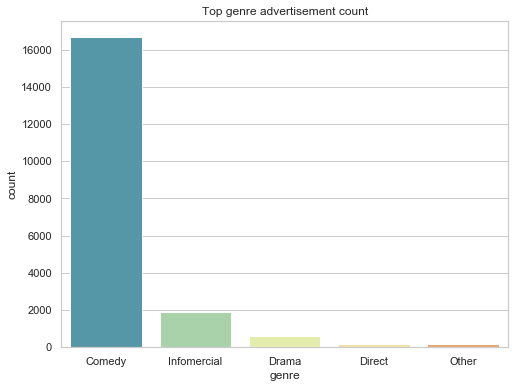

In [14]:
plt.figure(figsize=(8,6))
sns.countplot('genre', data=df_eda)
plt.title('Top genre advertisement count')
plt.show()

<b>Insight:</b> <br>
- Comedy is the most preferable genre in advertisement.

## Which of the top industries having maximum total average runtime for Comedy genre?

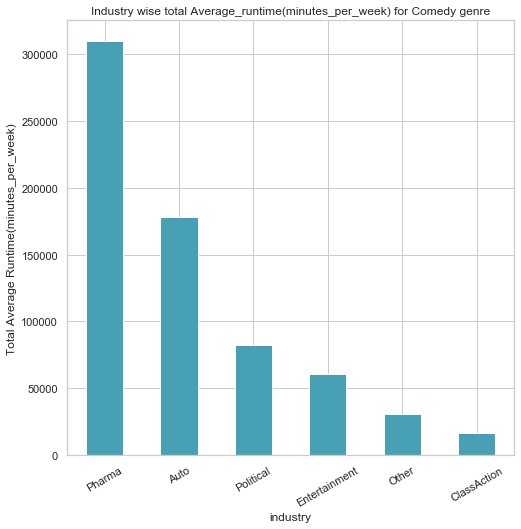

In [15]:
# Industry wise total Average_runtime(minutes_per_week) for Comedy genre 
df_comedy = df_eda[df_eda['genre'] == 'Comedy']
comedy_industry = df_comedy.groupby(['industry'])['average_runtime(minutes_per_week)'].sum().sort_values(ascending=False)

comedy_industry.plot(kind='bar',figsize=(8,8))
plt.title('Industry wise total Average_runtime(minutes_per_week) for Comedy genre')
plt.ylabel('Total Average Runtime(minutes_per_week)')
plt.xticks(rotation=30)
plt.show()

<b>Insight:</b><br>
- Pharma industry having highest total average runtime for Comedy genre.
- ClassAction industry having lowest total average runtime for Comedy genre.

## Which are the top 10 airlocation having highest total average runtime across all the genre?

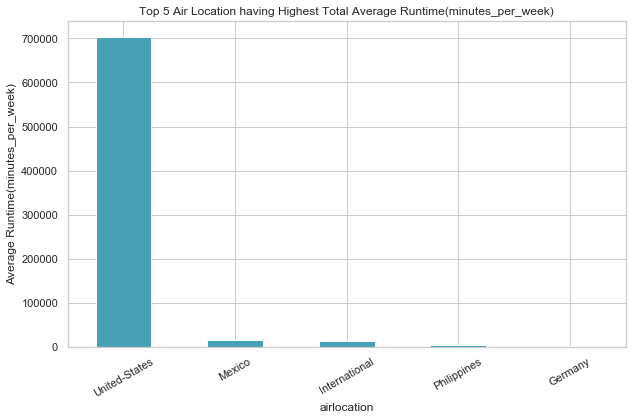

In [76]:
air_loc = df_eda.groupby(['airlocation'])['average_runtime(minutes_per_week)'].sum().sort_values(ascending=False)[:5]

air_loc.plot(kind='bar',figsize=(10,6))
plt.title('Top 5 Air Location having Highest Total Average Runtime(minutes_per_week)')
plt.ylabel('Average Runtime(minutes_per_week)')
plt.xticks(rotation=30)
plt.show()

<b>Insight:</b><br>
- United-States having highest total average runtime(minutes_per_week)

## Expensive Vs Money back guarantee rate

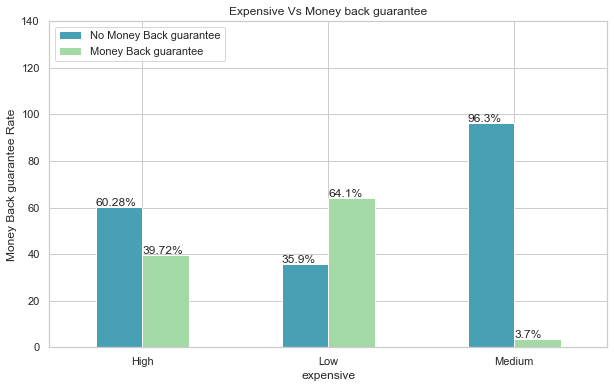

In [17]:
# Expensive Versus Money back guarantee rate
df_expense = pd.DataFrame(df_eda.groupby('expensive')['money_back_guarantee'].value_counts(normalize = True)*100)
ax = df_expense.unstack().plot(kind ='bar',figsize =(10,6))

for i in ax.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    ax.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.ylabel("Money Back guarantee Rate")
plt.title("Expensive Vs Money back guarantee")
plt.legend(['No Money Back guarantee', 'Money Back guarantee'], loc = 'upper left')
plt.ylim(0,140)
plt.xticks(rotation=0)
plt.show()

<b>Insight:</b><br>
- High and medium expensive advertisements having low money back guarantee rate.
- Low expensive advertisements having high money back guarantee rate.

## Top Genre having highest average ratings

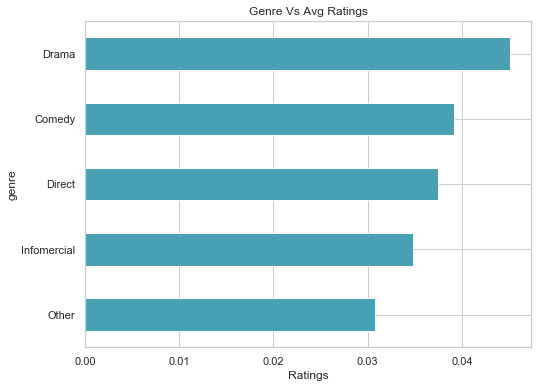

In [18]:
# Top genre having highest average ratings
plt.figure(figsize=(8,6))
df_eda.groupby(['genre'])['ratings'].mean().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Ratings')
plt.title('Genre Vs Avg Ratings')
plt.show()

<b>Insight:</b><br>
- Drama advertisements having highest average rating.

## Average Runtime(minutes_per_week) Vs Ratings Plot

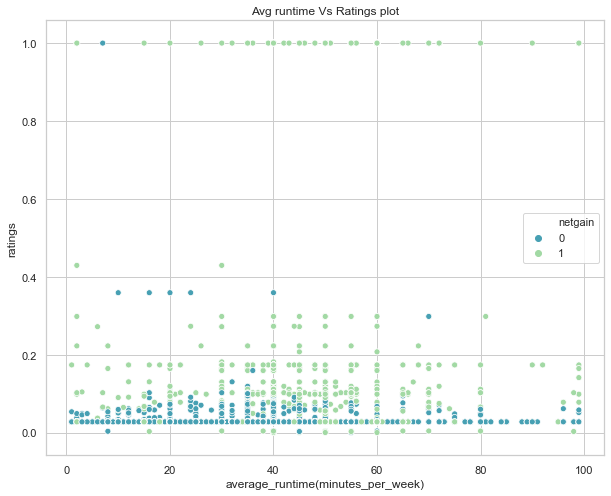

In [19]:
# Average Runtime(minutes_per_week) Vs Ratings Plot
plt.figure(figsize=(10,8))
sns.scatterplot('average_runtime(minutes_per_week)', 'ratings', data=df_eda, hue='netgain')
plt.title('Avg runtime Vs Ratings plot')
plt.show()

<b>Insight:</b><br>
- Advertisements having rating equal to one, can contribute for net gain.

# Feature Engineering

## Numerical Data

### Handling outliers

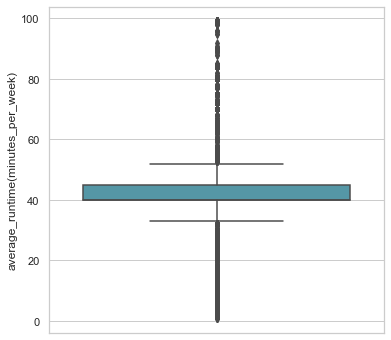

In [20]:
#Box Plot before outlier treatment

plt.figure(figsize=(6,6))
sns.boxplot(y='average_runtime(minutes_per_week)', data=df_eda)
plt.show()

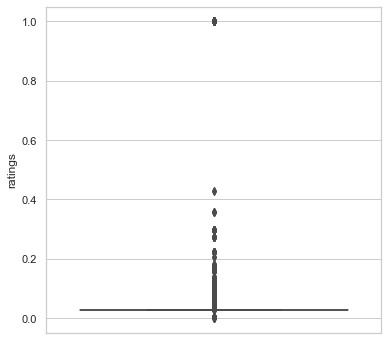

In [21]:
plt.figure(figsize=(6,6))
sns.boxplot(y='ratings', data=df_eda)
plt.show()

<b>Insight:</b></br>
- Average_runtime(minutes_per_week) feature having normal highest values.
- Ratings feature with value is equal to 1 is highly contributing in net gain.

## Categorical Data

### One Hot Encoding techniques

In [91]:
for col in columns:
    print('Number of unique values for column', col, len(df_eda[col].unique()))
    print('Unique values of column', col, df_eda[col].unique(), '\n')

Number of unique values for column realtionship_status 7
Unique values of column realtionship_status ['Married-civ-spouse' 'Never-married' 'Divorced' 'Separated' 'Widowed'
 'Married-spouse-absent' 'Married-AF-spouse'] 

Number of unique values for column industry 6
Unique values of column industry ['Pharma' 'Political' 'Auto' 'Other' 'Entertainment' 'ClassAction'] 

Number of unique values for column genre 5
Unique values of column genre ['Comedy' 'Infomercial' 'Drama' 'Direct' 'Other'] 

Number of unique values for column targeted_sex 2
Unique values of column targeted_sex ['Male' 'Female'] 

Number of unique values for column airtime 3
Unique values of column airtime ['Daytime' 'Morning' 'Primetime'] 

Number of unique values for column airlocation 42
Unique values of column airlocation ['United-States' 'International' 'Mexico' 'Hong' 'Cuba' 'Germany' 'India'
 'Iran' 'Dominican-Republic' 'Philippines' 'Japan' 'Italy' 'South'
 'Poland' 'Vietnam' 'Columbia' 'Outlying-US(Guam-USVI-etc)'

In [10]:
# One hot encoding on selected columns
one_hot_col = ['targeted_sex', 'airtime', 'expensive', 'money_back_guarantee']

In [11]:
X_cat = df_train[one_hot_col]
X_cat.head(2)
X_cat_one_hot_train = pd.get_dummies(X_cat, drop_first=True)

#Merge With original df
cat_proc_columns = X_cat_one_hot_train.columns
for col in cat_proc_columns:
    df_eda[col] = X_cat_one_hot_train[col] 
    
df_eda.head(2)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain,targeted_sex_Male,airtime_Morning,airtime_Primetime,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0,1,0,0,0,1,0
1,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0,1,1,0,1,0,0


In [12]:
X_cat_t = df_test[one_hot_col]
X_cat_t.head(2)
X_cat_one_hot_test = pd.get_dummies(X_cat_t, drop_first=True)

#Merge With original df
cat_proc_columns = X_cat_one_hot_test.columns
for col in cat_proc_columns:
    df_test_eda[col] = X_cat_one_hot_test[col] 
    
df_test_eda.head(2)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,targeted_sex_Male,airtime_Morning,airtime_Primetime,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes,0,0,1,0,0,1
1,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No,0,0,1,1,0,0


### Frequency Encoding

In [13]:
# Frequency encoding on selected columns

frequency = df_eda.groupby('realtionship_status').size()/len(df_eda)
df_eda.loc[:,'realtionship_status_fcode'] = df_eda['realtionship_status'].map(frequency)

frequency_1 = df_eda.groupby('industry').size()/len(df_eda)
df_eda.loc[:,'industry_fcode'] = df_eda['industry'].map( frequency_1)

frequency_2 = df_eda.groupby('genre').size()/len(df_eda)    
df_eda.loc[:,'genre_fcode'] = df_eda['genre'].map(frequency_2)

frequency_3 = df_eda.groupby('airlocation').size()/len(df_eda)    
df_eda.loc[:,'airlocation_fcode'] = df_eda['airlocation'].map(frequency_3)

# Drop same columns
df_eda.drop(columns='realtionship_status', axis=1, inplace=True)
df_eda.drop(columns='industry', axis=1, inplace=True)
df_eda.drop(columns='genre', axis=1, inplace=True)
df_eda.drop(columns='airlocation', axis=1, inplace=True)

In [14]:
# Frequency encoding on selected columns

frequency = df_test_eda.groupby('realtionship_status').size()/len(df_test_eda)
df_test_eda.loc[:,'realtionship_status_fcode'] = df_test_eda['realtionship_status'].map(frequency)

frequency_1 = df_test_eda.groupby('industry').size()/len(df_test_eda)
df_test_eda.loc[:,'industry_fcode'] = df_test_eda['industry'].map( frequency_1)

frequency_2 = df_test_eda.groupby('genre').size()/len(df_test_eda)    
df_test_eda.loc[:,'genre_fcode'] = df_test_eda['genre'].map(frequency_2)

frequency_3 = df_test_eda.groupby('airlocation').size()/len(df_test_eda)    
df_test_eda.loc[:,'airlocation_fcode'] = df_test_eda['airlocation'].map(frequency_3)

# Drop same columns
df_test_eda.drop(columns='realtionship_status', axis=1, inplace=True)
df_test_eda.drop(columns='industry', axis=1, inplace=True)
df_test_eda.drop(columns='genre', axis=1, inplace=True)
df_test_eda.drop(columns='airlocation', axis=1, inplace=True)

In [15]:
# Droping remaining categorical columns
df_eda.drop(one_hot_col, axis=1, inplace=True)
df_test_eda.drop(one_hot_col, axis=1, inplace=True)

In [16]:
df_eda.head(2).T

,0,1
average_runtime(minutes_per_week),40.000000,35.000000
ratings,0.027465,0.027465
netgain,0.000000,0.000000
targeted_sex_Male,1.000000,1.000000
airtime_Morning,0.000000,1.000000
airtime_Primetime,0.000000,0.000000
expensive_Low,0.000000,1.000000
expensive_Medium,1.000000,0.000000
money_back_guarantee_Yes,0.000000,0.000000
realtionship_status_fcode,0.455518,0.329290


# Feature Selection

## Co-relation Matrix

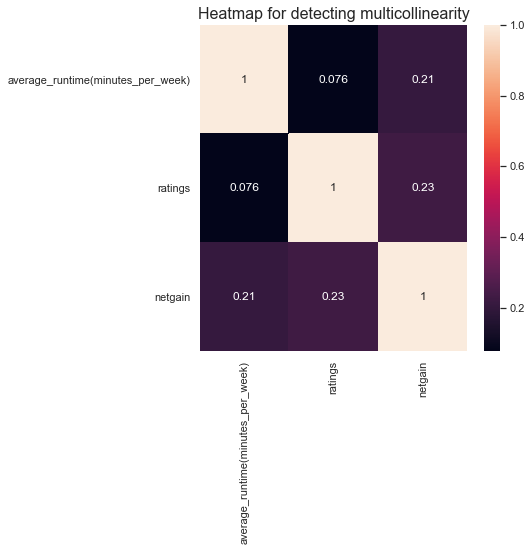

In [17]:
# Apply Co-relation on numerical column

fig = plt.figure(figsize=(6, 6))
sns.heatmap(df_eda[num_col].corr(), annot=True)
plt.title('Heatmap for detecting multicollinearity', fontsize=16)
plt.show()

## CHI-Square Test

In [18]:
# Chi-square test for categorical features

df_chi = df_train[['realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 'airlocation', 'expensive', 'money_back_guarantee']]

X_chi = pd.get_dummies(df_chi, drop_first=True)
y_chi = df_train['netgain']
X_chi.shape

(19536, 62)

In [20]:
# Apply Chi2 and fit the random forest model on train data use df dataset
nof_list   = [1, 10, 20, 30, 40, 50, 60]
high_score = 0
nof        = 0

for n in nof_list:
    test = SelectKBest(score_func = chi2 , k = n)
    X_train, X_test, y_train, y_test = train_test_split(X_chi, y_chi, test_size=0.3, random_state = 42)
    
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    
    if model.score(X_test,y_test) > high_score:
        high_score = model.score(X_test, y_test)
        model_ = model
        nof=n 
    print("High Score is:",high_score, "with features=",nof)

For no of features= 1 , score= 0.7595973383381676
High Score is: 0.7595973383381676 with features= 1
For no of features= 10 , score= 0.7614741511687425
High Score is: 0.7614741511687425 with features= 10
For no of features= 20 , score= 0.7708582153216175
High Score is: 0.7708582153216175 with features= 20
For no of features= 30 , score= 0.7701757379286811
High Score is: 0.7708582153216175 with features= 20
For no of features= 40 , score= 0.7693226411875107
High Score is: 0.7708582153216175 with features= 20
For no of features= 50 , score= 0.7691520218392766
High Score is: 0.7708582153216175 with features= 20
For no of features= 60 , score= 0.7674458283569356
High Score is: 0.7708582153216175 with features= 20


## Recursive Feature Elimination

In [33]:
X = df_eda.drop('netgain', 1)
y = df_eda['netgain']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [34]:
from sklearn.feature_selection import RFE 
# create a base classifier used to evaluate a subset of attributes
model = RandomForestClassifier()

# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns)))

[ True  True False  True  True  True False  True  True  True  True  True]
[1 1 2 1 1 1 3 1 1 1 1 1]
Features sorted by their rank:
[(1, 'airlocation_fcode'), (1, 'airtime_Morning'), (1, 'airtime_Primetime'), (1, 'average_runtime(minutes_per_week)'), (1, 'expensive_Low'), (1, 'genre_fcode'), (1, 'industry_fcode'), (1, 'money_back_guarantee_Yes'), (1, 'ratings'), (1, 'realtionship_status_fcode'), (2, 'targeted_sex_Male'), (3, 'expensive_Medium')]


# Feature Importance

## Decision Tree Classifier

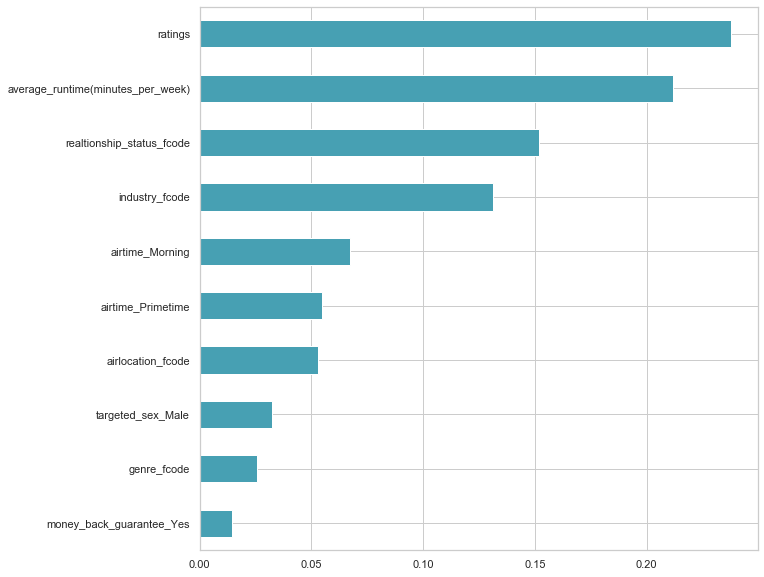

In [35]:
plt.figure(figsize=(10, 10))
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

## XGBoost Classifier

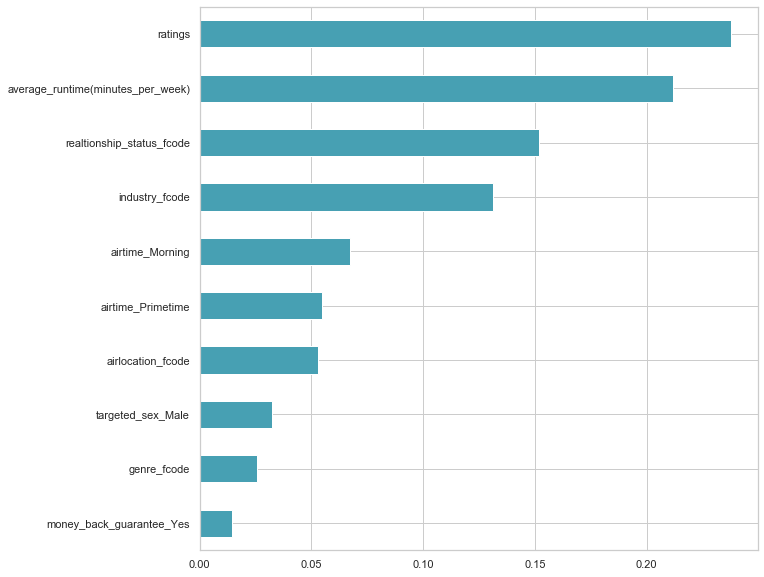

In [36]:
plt.figure(figsize=(10, 10))
# Build a forest and compute the feature importances
XGB = XGBClassifier(n_estimators=250, random_state=0)
XGB.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

In [37]:
# Feature Importance
feat_importances.nlargest(12)

ratings                              0.237799
average_runtime(minutes_per_week)    0.212041
realtionship_status_fcode            0.151720
industry_fcode                       0.131108
airtime_Morning                      0.067106
airtime_Primetime                    0.054739
airlocation_fcode                    0.053077
targeted_sex_Male                    0.032574
genre_fcode                          0.025607
money_back_guarantee_Yes             0.014287
expensive_Low                        0.012696
expensive_Medium                     0.007246
dtype: float64

# Model Selection

## Imbalanced Data

In [21]:
X = df_eda.drop('netgain', 1)
y = df_eda['netgain']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [22]:
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
# df_scalar = scaler.transform(df_eda)

print('Shape of data', X_train.shape, y_train.shape)

Shape of data (13675, 12) (13675,)


## Balanced Data (SMOTE)

In [23]:
smote = SMOTE(random_state=10)

X_SMOTE, y_SMOTE = smote.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_SMOTE, y_SMOTE, random_state=0, test_size=0.3)

print('Shape of data', X_train_smote.shape, y_train_smote.shape)

Shape of data (20840, 12) (20840,)


## Balanced Data (SMOTE Tomek)

In [24]:
tomek = SMOTETomek(random_state=10)

X_tomek, y_tomek = tomek.fit_resample(X, y)
X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek = train_test_split(X_tomek, y_tomek, random_state=0, test_size=0.3)

print('Shape of data', X_train_tomek.shape, y_train_tomek.shape)

Shape of data (20539, 12) (20539,)


## Model Building

In [25]:
models = {'Random Forest Classifier':RandomForestClassifier(min_samples_split= 2, min_samples_leaf= 1,\
           max_features= 'sqrt', max_depth= 560,criterion= 'entropy'), 
          'Logistic Regression':LogisticRegression(), 
          'XGBoost Classifier':XGBClassifier(), 
          'Decision Tree Classifier': DecisionTreeClassifier()}

In [26]:
def model_building(models, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
    for name, model in models.items():
        score = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(shuffle=True),\
                                scoring='f1', n_jobs=-1)
        print(f'{name} f1-score : {np.mean(score)}')
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
        print("=="*30)
        print("Classification Report: \n",classification_report(y_test,y_pred))

In [27]:
print('With Imbalanced Data')
print("=="*30)
model_building(models, X, y)

With Imbalanced Data
Random Forest Classifier f1-score : 0.5118375723599509
Confusion Matrix: 
 [[4071  378]
 [ 749  663]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      4449
           1       0.64      0.47      0.54      1412

    accuracy                           0.81      5861
   macro avg       0.74      0.69      0.71      5861
weighted avg       0.79      0.81      0.80      5861

Logistic Regression f1-score : 0.4005963550042705
Confusion Matrix: 
 [[4220  229]
 [ 948  464]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4449
           1       0.67      0.33      0.44      1412

    accuracy                           0.80      5861
   macro avg       0.74      0.64      0.66      5861
weighted avg       0.78      0.80      0.77      5861

XGBoost Classifier f1-score : 0.5340223394953648
Confusion Matrix: 
 [[4170 

In [28]:
print('With SMOTE balanced Data')
print("=="*30)
model_building(models, X_SMOTE, y_SMOTE)

With SMOTE balanced Data
Random Forest Classifier f1-score : 0.8347195903578722
Confusion Matrix: 
 [[3466  984]
 [ 510 3972]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      4450
           1       0.80      0.89      0.84      4482

    accuracy                           0.83      8932
   macro avg       0.84      0.83      0.83      8932
weighted avg       0.84      0.83      0.83      8932

Logistic Regression f1-score : 0.7719194223574611
Confusion Matrix: 
 [[3243 1207]
 [ 837 3645]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      4450
           1       0.75      0.81      0.78      4482

    accuracy                           0.77      8932
   macro avg       0.77      0.77      0.77      8932
weighted avg       0.77      0.77      0.77      8932

XGBoost Classifier f1-score : 0.8431036769129665
Confusion Matrix: 
 [[3

In [29]:
print('With SMOTE Tomek balanced Data')
print("=="*30)
model_building(models, X_tomek, y_tomek)

With SMOTE Tomek balanced Data
Random Forest Classifier f1-score : 0.8411270576605988
Confusion Matrix: 
 [[3400 1006]
 [ 461 3936]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      4406
           1       0.80      0.90      0.84      4397

    accuracy                           0.83      8803
   macro avg       0.84      0.83      0.83      8803
weighted avg       0.84      0.83      0.83      8803

Logistic Regression f1-score : 0.7801225144984968
Confusion Matrix: 
 [[3157 1249]
 [ 856 3541]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.72      0.75      4406
           1       0.74      0.81      0.77      4397

    accuracy                           0.76      8803
   macro avg       0.76      0.76      0.76      8803
weighted avg       0.76      0.76      0.76      8803

XGBoost Classifier f1-score : 0.8461441184800769
Confusion Matrix:

<b>Insight:</b><br>
- XGBoost Classifier with SMOTE Tomek technique gives maximum F1-Score : 0.8451358856909236

# Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV
def grid_search_cv(estimator, parameters):
    grid_search = GridSearchCV(
        estimator = estimator,
        param_grid = parameters,
        scoring = 'precision',
        n_jobs = 10,
        cv = 10,
        verbose=True
    )
    grid_search.fit(X_tomek, y_tomek)
    return grid_search

## Random Forest Classifier

In [50]:
#Random Forest GRID SEARCH CV
estimator = RandomForestClassifier(random_state=9)
parameters = {'n_estimators': [10, 50, 100], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,3,5] 
             }
grid_search = grid_search_cv(estimator, parameters)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   32.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  3.4min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  5.1min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  6.6min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  8.9min
[Parallel(n_jobs=10)]: Done 3240 out of 3240 | elapsed:  9.1min finished


RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_split=3, random_state=9)


In [31]:
column_names = ['ratings', 'average_runtime(minutes_per_week)', 'realtionship_status_fcode', \
                'industry_fcode', 'airtime_Morning', 'airtime_Primetime', 'airlocation_fcode', \
                'targeted_sex_Male', 'genre_fcode', 'money_back_guarantee_Yes', 'expensive_Low', 'expensive_Medium']

X_tomek = X_tomek[column_names]

X_train, X_test, y_train, y_test = train_test_split(X_tomek, y_tomek, random_state = 0, test_size = 0.3)

#scaler = StandardScaler()
#scaler  = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test  = scaler.transform(X_test)

rfc_model = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',\
                                   min_samples_split=3, random_state=9)

score = cross_val_score(rfc_model, X_train, y_train, cv=StratifiedKFold(shuffle=True), scoring='f1', n_jobs=-1)

print(f'f1-score : {np.mean(score)}')

rfc_model.fit(X_train, y_train)
        
y_pred = rfc_model.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("=="*30)
print("Classification Report: \n",classification_report(y_test,y_pred))

f1-score : 0.8208902675373764
Confusion Matrix: 
 [[3168 1238]
 [ 482 3915]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79      4406
           1       0.76      0.89      0.82      4397

    accuracy                           0.80      8803
   macro avg       0.81      0.80      0.80      8803
weighted avg       0.81      0.80      0.80      8803



## XGBoost Implementation

In [51]:
#XGBOOST GRID SEARCH CV
estimator = XGBClassifier(
    objective = 'binary:logistic',
    nthread = 4,
    seed = 42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = grid_search_cv(estimator, parameters)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   14.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  6.1min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 12.2min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed: 16.1min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [32]:
column_names = ['ratings', 'average_runtime(minutes_per_week)', 'realtionship_status_fcode', \
                'industry_fcode', 'airtime_Morning', 'airtime_Primetime', 'airlocation_fcode', \
                'targeted_sex_Male', 'genre_fcode', 'money_back_guarantee_Yes', 'expensive_Low', 'expensive_Medium']

X_tomek = X_tomek[column_names]

X_train, X_test, y_train, y_test = train_test_split(X_tomek, y_tomek, random_state = 0, test_size = 0.3)

#scaler = StandardScaler()
#scaler  = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test  = scaler.transform(X_test)

xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, \
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1, \
              importance_type='gain', interaction_constraints='', \
              learning_rate=0.1, max_delta_step=0, max_depth=8, \
              min_child_weight=1, missing=np.nan, monotone_constraints='()', \
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1, \
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, \
              seed=42, subsample=1, tree_method='exact', validate_parameters=1, \
              verbosity=None)

# Fit the model
xgb_model.fit(X_train, y_train)

# Store the predicted values of test data
y_pred = xgb_model.predict(X_test)


score = cross_val_score(xgb_model, X_train, y_train, cv=StratifiedKFold(shuffle=True), scoring='f1', n_jobs=-1)

print(f'f1-score : {np.mean(score)}')

xgb_model.fit(X_train, y_train)
        
y_pred = xgb_model.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("=="*30)
print("Classification Report: \n",classification_report(y_test,y_pred))

f1-score : 0.8459223056781797
Confusion Matrix: 
 [[3426  980]
 [ 429 3968]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      4406
           1       0.80      0.90      0.85      4397

    accuracy                           0.84      8803
   macro avg       0.85      0.84      0.84      8803
weighted avg       0.85      0.84      0.84      8803



# Prediction on Test Data

In [33]:
# Read the test data

# Storing the id from the test file
id_ = df_test['UserID']

test_cols = ['ratings', 'average_runtime(minutes_per_week)', 'realtionship_status_fcode', 'industry_fcode', \
             'airtime_Morning', 'airtime_Primetime', 'airlocation_fcode', 'targeted_sex_Male', 'genre_fcode', \
             'money_back_guarantee_Yes', 'expensive_Low', 'expensive_Medium']

df_test_eda = df_test_eda[test_cols]

df_test_eda.head().T

,0,1,2,3,4
ratings,0.027465,0.027465,0.027465,0.027465,0.027465
average_runtime(minutes_per_week),40.000000,40.000000,40.000000,30.000000,70.000000
realtionship_status_fcode,0.324631,0.145731,0.452242,0.324631,0.324631
industry_fcode,0.107647,0.267660,0.399877,0.267660,0.149724
airtime_Morning,0.000000,0.000000,0.000000,0.000000,1.000000
airtime_Primetime,1.000000,1.000000,1.000000,1.000000,0.000000
airlocation_fcode,0.893120,0.893120,0.893120,0.893120,0.893120
targeted_sex_Male,0.000000,0.000000,1.000000,1.000000,1.000000
genre_fcode,0.099048,0.853655,0.099048,0.853655,0.853655
money_back_guarantee_Yes,1.000000,0.000000,0.000000,1.000000,0.000000


In [34]:
# Predict on the test data
y_pred_test = xgb_model.predict(df_test_eda)
y_pred_test = y_pred_test.flatten()

# Create a sample submission file
sample_submission = pd.DataFrame({'netgain':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('Submission_test.csv',index=False)

print(sample_submission.head())

   netgain
0        1
1        1
2        1
3        1
4        1
